##Red neuronal - predicción rendimiento de estudiantes

Este es un proyecto de machine learning o aprenizaje automatico con la finalidad de practicar las diferentes habilidades requeridad para este tipo de tareas . El proposito es realizar una red neuronal capaz de analizar ciertas caracteristicas de estudiantes entregadas por medio de un dataset y que esta sea capaz de predecir posibles rendimientos futuros de otros estudiantes.

Realizado por Luis Felipe Sánchez Sánchez

Importamos Librerias

In [1]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

Conectamos a drive y extraemos el dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Conectamos con el dataset
students_df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Red-Neuronal-Rendimiento-Estudiantes/study_performance.csv')

Validamos el dataset

In [4]:
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Validamos la limpieza de datos y datos faltantes

In [5]:
students_df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [6]:
students_df.isna()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


##Sección analisis de datos

Graficamos información para enteder un poco el dataset

##Procesamiendo de la Red

Variable a precedir, dependiente: "Score"

In [7]:
#Extraemos todas las columnas que tengan en su nombre "column" y las agrupamos en un arreglo
scrore_columns = [columna for columna in students_df.columns if columna.endswith('score')]
scrore_columns

['math_score', 'reading_score', 'writing_score']

In [8]:
#Agregamos la columna score con la media de los 3 score
students_df['score'] = round(students_df[scrore_columns].sum(axis=1)/30)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,7.0
1,female,group C,some college,standard,completed,69,90,88,8.0
2,female,group B,master's degree,standard,none,90,95,93,9.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.0
4,male,group C,some college,standard,none,76,78,75,8.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.0
996,male,group C,high school,free/reduced,none,62,55,55,6.0
997,female,group C,high school,free/reduced,completed,59,71,65,6.0
998,female,group D,some college,standard,completed,68,78,77,7.0


In [9]:
#Creamos una copia del dataset para evitar perdida de información
students_df_cp = students_df.copy()

In [10]:
students_df_cp

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,7.0
1,female,group C,some college,standard,completed,69,90,88,8.0
2,female,group B,master's degree,standard,none,90,95,93,9.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.0
4,male,group C,some college,standard,none,76,78,75,8.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.0
996,male,group C,high school,free/reduced,none,62,55,55,6.0
997,female,group C,high school,free/reduced,completed,59,71,65,6.0
998,female,group D,some college,standard,completed,68,78,77,7.0


In [11]:
#Eliminamos el arreglo ya creado que contenia las columnas de score
students_df_cp.drop(scrore_columns, axis=1, inplace=True)
students_df_cp

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score
0,female,group B,bachelor's degree,standard,none,7.0
1,female,group C,some college,standard,completed,8.0
2,female,group B,master's degree,standard,none,9.0
3,male,group A,associate's degree,free/reduced,none,5.0
4,male,group C,some college,standard,none,8.0
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,9.0
996,male,group C,high school,free/reduced,none,6.0
997,female,group C,high school,free/reduced,completed,6.0
998,female,group D,some college,standard,completed,7.0


##Tratamiento de variables categoricas


Para este caso manejaremos las variables con el metodo OneHotEncoder, unicamente para ciertas variables en especifico

In [12]:
#Se hará una conversión de variables con el metodo OneHotEncoder, con la finalidad de que las predicciones sean más precisas
encoder = OneHotEncoder(sparse_output=False)

In [13]:
#Cuando el arreglo es "1,0" es mujer, cuando es "0,1" es hombre
encoded_data = encoder.fit_transform(students_df_cp[['gender']])
encoded_data

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
#Si gender_female es 1.0 es mujer, pero, si gender_male es 1.0 es hombre
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender']))
encoded_df

,gender_female,gender_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
995,1.0,0.0
996,0.0,1.0
997,1.0,0.0
998,1.0,0.0


In [15]:
#Eliminamos la columna gender del studentes_df_cp y agregamos las dos que acabamos de crear
students_df_cp.drop('gender', axis=1, inplace=True)
students_df_cp = pd.concat([students_df_cp, encoded_df], axis=1)
students_df_cp

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,7.0,1.0,0.0
1,group C,some college,standard,completed,8.0,1.0,0.0
2,group B,master's degree,standard,none,9.0,1.0,0.0
3,group A,associate's degree,free/reduced,none,5.0,0.0,1.0
4,group C,some college,standard,none,8.0,0.0,1.0
...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,9.0,1.0,0.0
996,group C,high school,free/reduced,none,6.0,0.0,1.0
997,group C,high school,free/reduced,completed,6.0,1.0,0.0
998,group D,some college,standard,completed,7.0,1.0,0.0


In [16]:
#Hacemos lo mismo para la columna de test_preparation_course en cuanto a las varialbes categoricas
encoded_data = encoder.fit_transform(students_df_cp[['test_preparation_course']])
encoded_data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['test_preparation_course']))
encoded_df

,test_preparation_course_completed,test_preparation_course_none
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
995,1.0,0.0
996,0.0,1.0
997,1.0,0.0
998,1.0,0.0


In [17]:
#Eliminamos la columna test_preparation_course del studentes_df_cp y agregamos las dos que acabamos de crear
students_df_cp.drop('test_preparation_course', axis=1, inplace=True)
students_df_cp = pd.concat([students_df_cp, encoded_df], axis=1)
students_df_cp

,race_ethnicity,parental_level_of_education,lunch,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none
0,group B,bachelor's degree,standard,7.0,1.0,0.0,0.0,1.0
1,group C,some college,standard,8.0,1.0,0.0,1.0,0.0
2,group B,master's degree,standard,9.0,1.0,0.0,0.0,1.0
3,group A,associate's degree,free/reduced,5.0,0.0,1.0,0.0,1.0
4,group C,some college,standard,8.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,9.0,1.0,0.0,1.0,0.0
996,group C,high school,free/reduced,6.0,0.0,1.0,0.0,1.0
997,group C,high school,free/reduced,6.0,1.0,0.0,1.0,0.0
998,group D,some college,standard,7.0,1.0,0.0,1.0,0.0


In [18]:
#Hacemos lo mismo para la columna de lunch en cuanto a las varialbes categoricas
encoded_data = encoder.fit_transform(students_df_cp[['lunch']])
encoded_data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['lunch']))
encoded_df

,lunch_free/reduced,lunch_standard
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
995,0.0,1.0
996,1.0,0.0
997,1.0,0.0
998,0.0,1.0


In [19]:
#Eliminamos la columna lunch del studentes_df_cp y agregamos las dos que acabamos de crear
students_df_cp.drop('lunch', axis=1, inplace=True)
students_df_cp = pd.concat([students_df_cp, encoded_df], axis=1)
students_df_cp

,race_ethnicity,parental_level_of_education,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard
0,group B,bachelor's degree,7.0,1.0,0.0,0.0,1.0,0.0,1.0
1,group C,some college,8.0,1.0,0.0,1.0,0.0,0.0,1.0
2,group B,master's degree,9.0,1.0,0.0,0.0,1.0,0.0,1.0
3,group A,associate's degree,5.0,0.0,1.0,0.0,1.0,1.0,0.0
4,group C,some college,8.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,9.0,1.0,0.0,1.0,0.0,0.0,1.0
996,group C,high school,6.0,0.0,1.0,0.0,1.0,1.0,0.0
997,group C,high school,6.0,1.0,0.0,1.0,0.0,1.0,0.0
998,group D,some college,7.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
#Hacemos lo mismo para la columna de race_ethnicity en cuanto a las varialbes categoricas
encoded_data = encoder.fit_transform(students_df_cp[['race_ethnicity']])
encoded_data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['race_ethnicity']))
encoded_df

,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,1.0,0.0,0.0
997,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0


In [21]:
#Eliminamos la columna race_ethnicity del studentes_df_cp y agregamos las dos que acabamos de crear
students_df_cp.drop('race_ethnicity', axis=1, inplace=True)
students_df_cp = pd.concat([students_df_cp, encoded_df], axis=1)
students_df_cp

,parental_level_of_education,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,bachelor's degree,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,some college,8.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,master's degree,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,associate's degree,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,some college,8.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,9.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,high school,6.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
997,high school,6.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,some college,7.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Para la variable parental_level_of_education usaremos el metodo Ordinal encoding, que es una técnica para codificar variables categoricas basado en un orden en especifico

In [22]:
#Validamos cuantos elementos estan en la columna parental_level_of_education
students_df_cp['parental_level_of_education'].value_counts()

,count
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [23]:
#Envio las categorias que me arrojo la consulta anterior
ordinal_categories = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
#Ordenamos las categorias segun el arreglo creado anteriormente
encoder = OrdinalEncoder(categories=[ordinal_categories])
#Hacemos la transformación de los valores
encoded_data = encoder.fit_transform(students_df_cp[['parental_level_of_education']])
#Agregamos la variable encoded_data al dataset
df_encoded = pd.DataFrame(encoded_data, columns=['parental_level_of_education_encoded'])
students_df_cp = pd.concat([students_df_cp, df_encoded], axis=1)
#Eliminamos la variable parental_level_of_education del dataset
students_df_cp.drop('parental_level_of_education', axis=1, inplace=True)
students_df_cp

,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_encoded
0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
1,8.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
3,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
4,8.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
996,6.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,6.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,7.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0


##Sección de aprendizaje automatico

In [24]:
#Importamos librerias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

Estebleceremos la variable dependediente y la independiente, X y Y

In [25]:
Y = students_df_cp['score']
X = students_df_cp.drop('score', axis=1)

#establecemos variables para entrenar y para evaluar el modelo

#Establecemos el entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train

,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_encoded
29,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0
535,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
695,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
557,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
836,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0
270,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
860,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
435,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [26]:
#Iniciaremos usando el modelo random_forest
rd_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Entrenamos el modelo
rd_model.fit(X_train, Y_train)

#Ahora usaremos el modelo linear_regression
lr_model = LogisticRegression(random_state=42)
#Entrenamos el modelo
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [27]:
#Guardamos las predicciones hechas con cada modelo
rf_predictions = rd_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

In [28]:
#Medimos los errores en cada modelo para comparar, acausamos la metrica error cuadratico
rf_mse = mean_squared_error(Y_test, rf_predictions)
lr_mse = mean_squared_error(Y_test, lr_predictions)

print("Random Forest MSE: ", rf_mse)
print("Linear Regression MSE: ", lr_mse)

Random Forest MSE:  3.255
Linear Regression MSE:  2.16


Hacemos ejemplos de predicciones

In [32]:
print('Ejemplos de predicciones')
num_ejemplos = 15
for i in range(num_ejemplos):
  print(f" - Random Forest: {rf_predictions[i]} vs Linear Regression: {lr_predictions[i]} y la actual es: {Y_test.iloc[i]}")

Ejemplos de predicciones
 - Random Forest: 7.0 vs Linear Regression: 7.0 y la actual es: 9.0
 - Random Forest: 7.0 vs Linear Regression: 8.0 y la actual es: 6.0
 - Random Forest: 5.0 vs Linear Regression: 7.0 y la actual es: 8.0
 - Random Forest: 7.0 vs Linear Regression: 6.0 y la actual es: 7.0
 - Random Forest: 8.0 vs Linear Regression: 8.0 y la actual es: 8.0
 - Random Forest: 5.0 vs Linear Regression: 6.0 y la actual es: 8.0
 - Random Forest: 6.0 vs Linear Regression: 6.0 y la actual es: 7.0
 - Random Forest: 7.0 vs Linear Regression: 8.0 y la actual es: 6.0
 - Random Forest: 6.0 vs Linear Regression: 6.0 y la actual es: 8.0
 - Random Forest: 6.0 vs Linear Regression: 8.0 y la actual es: 5.0
 - Random Forest: 5.0 vs Linear Regression: 5.0 y la actual es: 5.0
 - Random Forest: 9.0 vs Linear Regression: 7.0 y la actual es: 3.0
 - Random Forest: 7.0 vs Linear Regression: 7.0 y la actual es: 8.0
 - Random Forest: 7.0 vs Linear Regression: 7.0 y la actual es: 6.0
 - Random Forest: 6.0 v

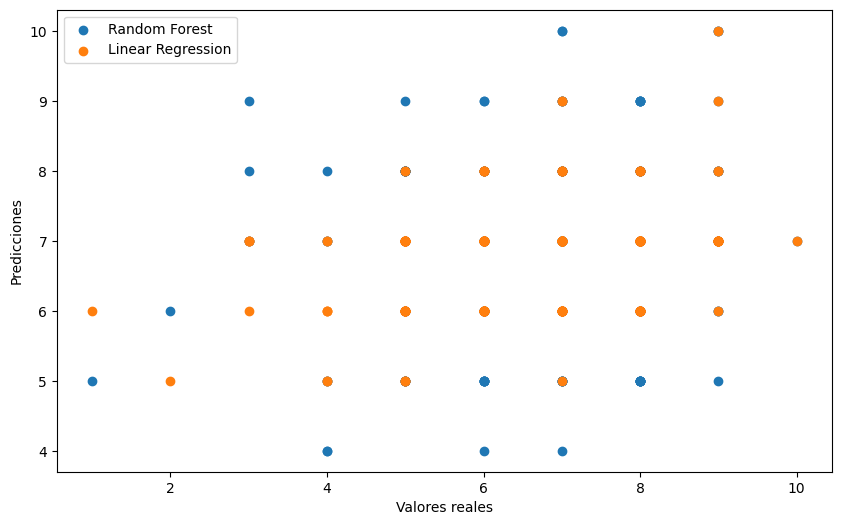

In [34]:
#Graficamos los resultados anteiores, del acual vs el random forest y el linear regression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_predictions, label='Random Forest')
plt.scatter(Y_test, lr_predictions, label='Linear Regression')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()